# 4번 문제 

다음은 1월부터 9월까지의 은의 가격이다

1.  은의 가격 및 이동평균값 3이 설정된 시계열 그래프를 그리세요. 
2.  1월 대비 9월의 은의 가격은 몇 % 올랐는가? (소수점 두번째 자리에서 반올림)

In [1]:
# 라이브러리 불러오기 
import pandas as pd 
import numpy as np

data = pd.read_csv("./data/26_problem4.csv")
data

,1M,2M,3M,4M,5M,6M,7M,8M,9M
0,12.14,42.6,34.4,35.29,30.96,57.12,37.84,42.49,31.38


In [2]:
ma_data = data.transpose() 
ma_data.columns = ["month_price"]
ma_data

,month_price
1M,12.14
2M,42.60
3M,34.40
4M,35.29
5M,30.96
6M,57.12
7M,37.84
8M,42.49
9M,31.38


In [13]:
ma_data["ma_3"] = 0 
ma_data.loc["3M","ma_3"] = ma_data["month_price"][0:3].mean()
ma_data.loc["4M","ma_3"] = ma_data["month_price"][1:4].mean()
ma_data.loc["5M","ma_3"] = ma_data["month_price"][2:5].mean()
ma_data.loc["6M","ma_3"] = ma_data["month_price"][3:6].mean()
ma_data.loc["7M","ma_3"] = ma_data["month_price"][4:7].mean()
ma_data.loc["8M","ma_3"] = ma_data["month_price"][5:8].mean()
ma_data.loc["9M","ma_3"] = ma_data["month_price"][6:9].mean()

ma_data

,month_price,ma_3
1M,12.14,0.000000
2M,42.60,0.000000
3M,34.40,29.713333
4M,35.29,37.430000
5M,30.96,33.550000
6M,57.12,41.123333
7M,37.84,41.973333
8M,42.49,45.816667
9M,31.38,37.236667


In [6]:
## 한 7행 정도라면 for문을 작성하는 것보다는 그냥 복사 붙여넣기로 하는게 편한듯 
## 시험장에서는 단순한게 최고!! 

for i in range(3,10): 
    ma_data.loc["{}M".format(i),"ma_3"] = ma_data["month_price"][i-3:i].mean()

In [7]:
ma_data

,month_price,ma_3
1M,12.14,0.000000
2M,42.60,0.000000
3M,34.40,29.713333
4M,35.29,37.430000
5M,30.96,33.550000
6M,57.12,41.123333
7M,37.84,41.973333
8M,42.49,45.816667
9M,31.38,37.236667


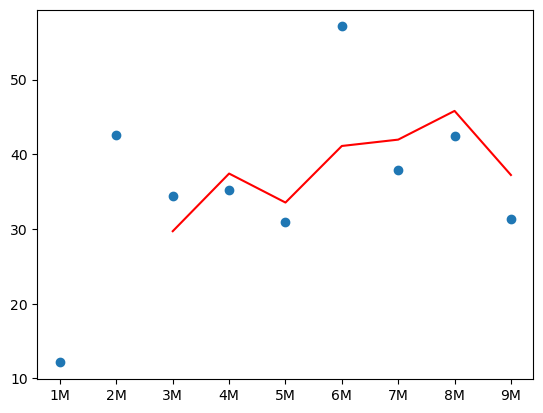

In [9]:
import matplotlib.pyplot as plt 
plt.scatter(x=ma_data.index ,y = ma_data["month_price"])
plt.plot(ma_data.index[2:], ma_data["ma_3"][2:],c='red')

## 4-2.  1월 대비 9월의 은의 가격은 몇 % 올랐는가? 소수점 두번째 자리에서 반올림

In [10]:
ma_data

,month_price,ma_3
1M,12.14,0.000000
2M,42.60,0.000000
3M,34.40,29.713333
4M,35.29,37.430000
5M,30.96,33.550000
6M,57.12,41.123333
7M,37.84,41.973333
8M,42.49,45.816667
9M,31.38,37.236667


In [11]:
round(ma_data["month_price"][-1]/ma_data["month_price"][0]*100,1)

258.5

# 정답 : 258.5%